# Events to design matrix

the purpose of this notebook is to figure out a way to generate design matrices from exp_tools2 events.tsv outputs (and psychopy log.txt files)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
# specify sub, ses, task, run
sub = 'pilot'
ses = '01'
task = 'CTS'
run = '06'

# load .tsv
root = 'logs'
filename = f"sub-{sub}_sess-{ses}_task-{task}_run-{run}_events.tsv"
filepath = os.path.join(root, filename)
df = pd.read_csv(filepath, sep = '\t')
df[df.response == 't']

,trial_nr,onset,event_type,phase,response,nr_frames,trial_type,stim_dur,oneOverF_texture_path,onset_abs,duration
3,999,1.314018,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,42.503282,NaN
4,999,2.630623,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,43.819887,NaN
6,999,3.947315,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,45.136579,NaN
7,999,5.263908,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,46.453172,NaN
8,999,6.580642,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,47.769906,NaN
...,...,...,...,...,...,...,...,...,...,...,...
441,998,342.420596,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,383.609860,NaN
442,998,343.737321,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,384.926585,NaN
443,998,345.053858,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,386.243122,NaN
444,998,346.370635,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,387.559899,NaN


Looking at the healthy trials where the response was 't', we see that 264 't's were recorded of a total 270 TRs. 5 TRs should have been empty, not sending 't's, while the first one seems to have started the experiment, not being recorded in the events.tsv (we see the first recorded TR is after 1.314 s in the table)

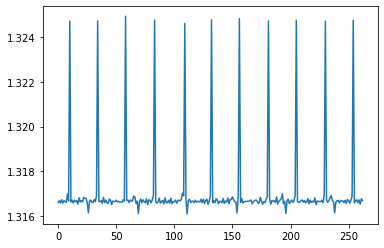

In [24]:
# plt.plot(df[df.response == 't'].onset, )
# plt.plot(np.diff(df[df.response == 't'].onset), )

In [34]:
df[(df.response == 't') &
   (df.phase == 0) &
   (df.stim_dur == 2.0) &
   (df.trial_type == 'isi')]#.stim_dur#.value_counts()

,trial_nr,onset,event_type,phase,response,nr_frames,trial_type,stim_dur,oneOverF_texture_path,onset_abs,duration
17,0,14.480857,pulse,0,t,NaN,isi,2.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,55.670121,NaN
23,1,18.438929,pulse,0,t,NaN,isi,2.0,./textures/minmax/oneOverF_texture_1_1024_96.bmp,59.628193,NaN
63,5,47.413727,pulse,0,t,NaN,isi,2.0,./textures/minmax/oneOverF_texture_1_1024_35.bmp,88.602991,NaN


In [53]:
# slice to only keep TR moments
recorded_trs_df = df[(df.response == 't')].reset_index()

# add a column to count TRs in saved BOLD space (270 vols)
recorded_trs_df['idx_TR'] = list(6 + recorded_trs_df.index)
recorded_trs_df

,index,trial_nr,onset,event_type,phase,response,nr_frames,trial_type,stim_dur,oneOverF_texture_path,onset_abs,duration,idx_TR
0,3,999,1.314018,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,42.503282,NaN,6
1,4,999,2.630623,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,43.819887,NaN,7
2,6,999,3.947315,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,45.136579,NaN,8
3,7,999,5.263908,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,46.453172,NaN,9
4,8,999,6.580642,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,47.769906,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,441,998,342.420596,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,383.609860,NaN,265
260,442,998,343.737321,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,384.926585,NaN,266
261,443,998,345.053858,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,386.243122,NaN,267
262,444,998,346.370635,pulse,2,t,NaN,dur,0.0,./textures/minmax/oneOverF_texture_1_1024_47.bmp,387.559899,NaN,268


In [59]:
recorded_trs_df.stim_dur.value_counts()

0.0     51
16.0    43
64.0    38
8.0     38
4.0     36
2.0     31
32.0    27
Name: stim_dur, dtype: int64

In [69]:
dm.shape

(13, 264)

## Producing design matrix

Important note: GLMSingle does not code the null trials, so the 0th column will be ommited in the end

In [78]:
n_conds = 13
# generate a design matrix
dm = np.zeros((len(recorded_trs_df)+6, n_conds))
trials = ["dur_0", "dur_2", "dur_4", "dur_8", "dur_16", "dur_32", "dur_64", 
          "isi_2", "isi_4", "isi_8", "isi_16", "isi_32", "isi_64"]

# loop over trials
for i, trial in enumerate(trials):
    trial_type, stim_dur = trial.split('_')
    cut = recorded_trs_df[(recorded_trs_df.trial_type == trial_type) &
                          (recorded_trs_df.phase == 0) &
                          (recorded_trs_df.stim_dur == float(stim_dur))]
#     print(cut.idx_TR.values)
    # insert
    dm[cut.idx_TR.values, i] = 1

# dm

(270, 13)


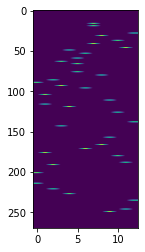

In [79]:
plt.imshow(dm, aspect = .1)
print(dm.shape)

## Going over all runs

In [89]:
# specify sub, ses, task, run
sub = 'pilot'
ses = '01'
task = 'CTS'
# run = '06'
n_conds = 13
n_runs = 6
n_TRs = 270 # final number of TRs
trials = ["dur_0", "dur_2", "dur_4", "dur_8", "dur_16", "dur_32", "dur_64", 
              "isi_2", "isi_4", "isi_8", "isi_16", "isi_32", "isi_64"]
dms_ses01 = np.zeros((6, 270, 13))

for run in range(1, n_runs + 1):
    # load .tsv
    root = 'logs'
    filename = f"sub-{sub}_sess-{ses}_task-{task}_run-{str(run).zfill(2)}_events.tsv"
    filepath = os.path.join(root, filename)
    
    try:
        df = pd.read_csv(filepath, sep = '\t')
 
    except FileNotFoundError:
        print("did not find this run, maybe saving events.tsv failed? Check log.txt")
        continue
    
    # slice to only keep TR moments
    recorded_trs_df = df[(df.response == 't')].reset_index()

    # add a column to count TRs in saved BOLD space (270 vols)
    recorded_trs_df['idx_TR'] = list(6 + recorded_trs_df.index)

    # generate a design matrix
#     dm = np.zeros((len(recorded_trs_df)+6, n_conds))

    # loop over trials
    for i, trial in enumerate(trials):
        trial_type, stim_dur = trial.split('_')
        cut = recorded_trs_df[(recorded_trs_df.trial_type == trial_type) &
                              (recorded_trs_df.phase == 0) &
                              (recorded_trs_df.stim_dur == float(stim_dur))]
#         print(run, cut.idx_TR.values, i)
        # insert
#         dm[cut.idx_TR.values, i] = 1
        dms_ses01[run-1, cut.idx_TR.values, i] = 1

    # dm

did not find this run, maybe saving events.tsv failed? Check log.txt
did not find this run, maybe saving events.tsv failed? Check log.txt
3 [ 16  53 156] 0
3 [ 35 213 218] 1
3 [ 84 230 240] 2
3 [ 74 144 224] 3
3 [ 39  48 125] 4
3 [ 25 175 236] 5
3 [ 97 141 201] 6
3 [ 88 117 181] 7
3 [ 57  92 104] 8
3 [178 194 248] 9
3 [ 63 148 191] 10
3 [101 107 170] 11
3 [ 28  77 128] 12
4 [ 47 166 195] 0
4 [ 29  86 181] 1
4 [100 162 213] 2
4 [ 81 223 238] 3
4 [ 23  42 209] 4
4 [115 169 226] 5
4 [118 186 189] 6
4 [ 37  94 129] 7
4 [109 122 201] 8
4 [ 71 172 241] 9
4 [ 97 139 157] 10
4 [ 16 230 234] 11
4 [ 60 136 153] 12
5 [108 138 145] 0
5 [ 91  95 155] 1
5 [ 50 215 242] 2
5 [ 16  21 132] 3
5 [ 36 193 238] 4
5 [ 68  78 226] 5
5 [ 44 117 170] 6
5 [ 31  98 196] 7
5 [121 164 201] 8
5 [ 41 124 245] 9
5 [ 47  54 174] 10
5 [101 186 209] 11
5 [ 74 160 183] 12
6 [ 89 201 214] 0
6 [104 116 176] 1
6 [ 86 191 221] 2
6 [ 63  93 143] 3
6 [ 49 119 227] 4
6 [59 66 76] 5
6 [ 53  96 171] 6
6 [16 19 41] 7
6 [ 31  80 16

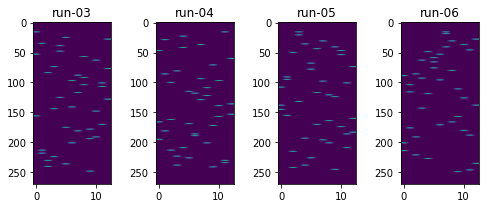

In [101]:
fig, axs = plt.subplots(1, 4, figsize = (7, 3))
# visualize
for i, ax in enumerate(axs):
    ax.imshow(dms_ses01[i+2, :, :], aspect = .1)
    ax.set_title(f'run-0{i+3}')
plt.tight_layout()
plt.show()


In [102]:
## save
filename = f"sub-{sub}_sess-{ses}_task-{task}_designs"

np.save(filename, dms_ses01)


## maybe of use

In [ ]:
def make_design_matrix(events_dict, max_t = 300, upsample_factor = 1, conds = ["dur_0", "dur_17", "dur_33", "dur_67", "dur_134",
                                                          "dur_267-isi_0", "dur_533", "isi_17", "isi_33",
                                                          "isi_67", "isi_134", "isi_267", "isi_533"]):
    
    # keep track of conds : tps
    regr_dict = {}
    
    # setup design matrix, shape max_t x len(conds + 1) to keep space for intercept
    design_matrix = np.zeros((max_t, len(conds) + 1))
    
    # for each cond
    for i, cond in enumerate(conds):
        # find timepoints of stimulation and downsample
        tps = [key//upsample_factor for key, val in events_dict.items() if val == cond]
        regr_dict[cond] = tps
        
        # setup regressor
        regressor = np.zeros(max_t)
        regressor[tps] = 1
        
        # convolve with HRF, cut to max_t, put into matrix
        conv_regressor = convolve_HRF(regressor, 1)[:max_t]
        design_matrix[:,i] = conv_regressor.T 
        
    # column of ones for intercept
    design_matrix[:,-1] = 1
    
    return design_matrix, regr_dict